## Question 2

2) Perform a model selection by doing hyperparameter optimization (grid search or other technique) as well as repeated K-fold CV sing atleast 3 models of your choice.

In [ ]:
!pip install scikit-learn

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics as metrics
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
%matplotlib inline

In [2]:
boston = pd.read_csv('Boston.csv')

In [3]:
boston.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
boston.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
boston.drop(columns=['Unnamed: 0'], axis=0, inplace=True)


In [6]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


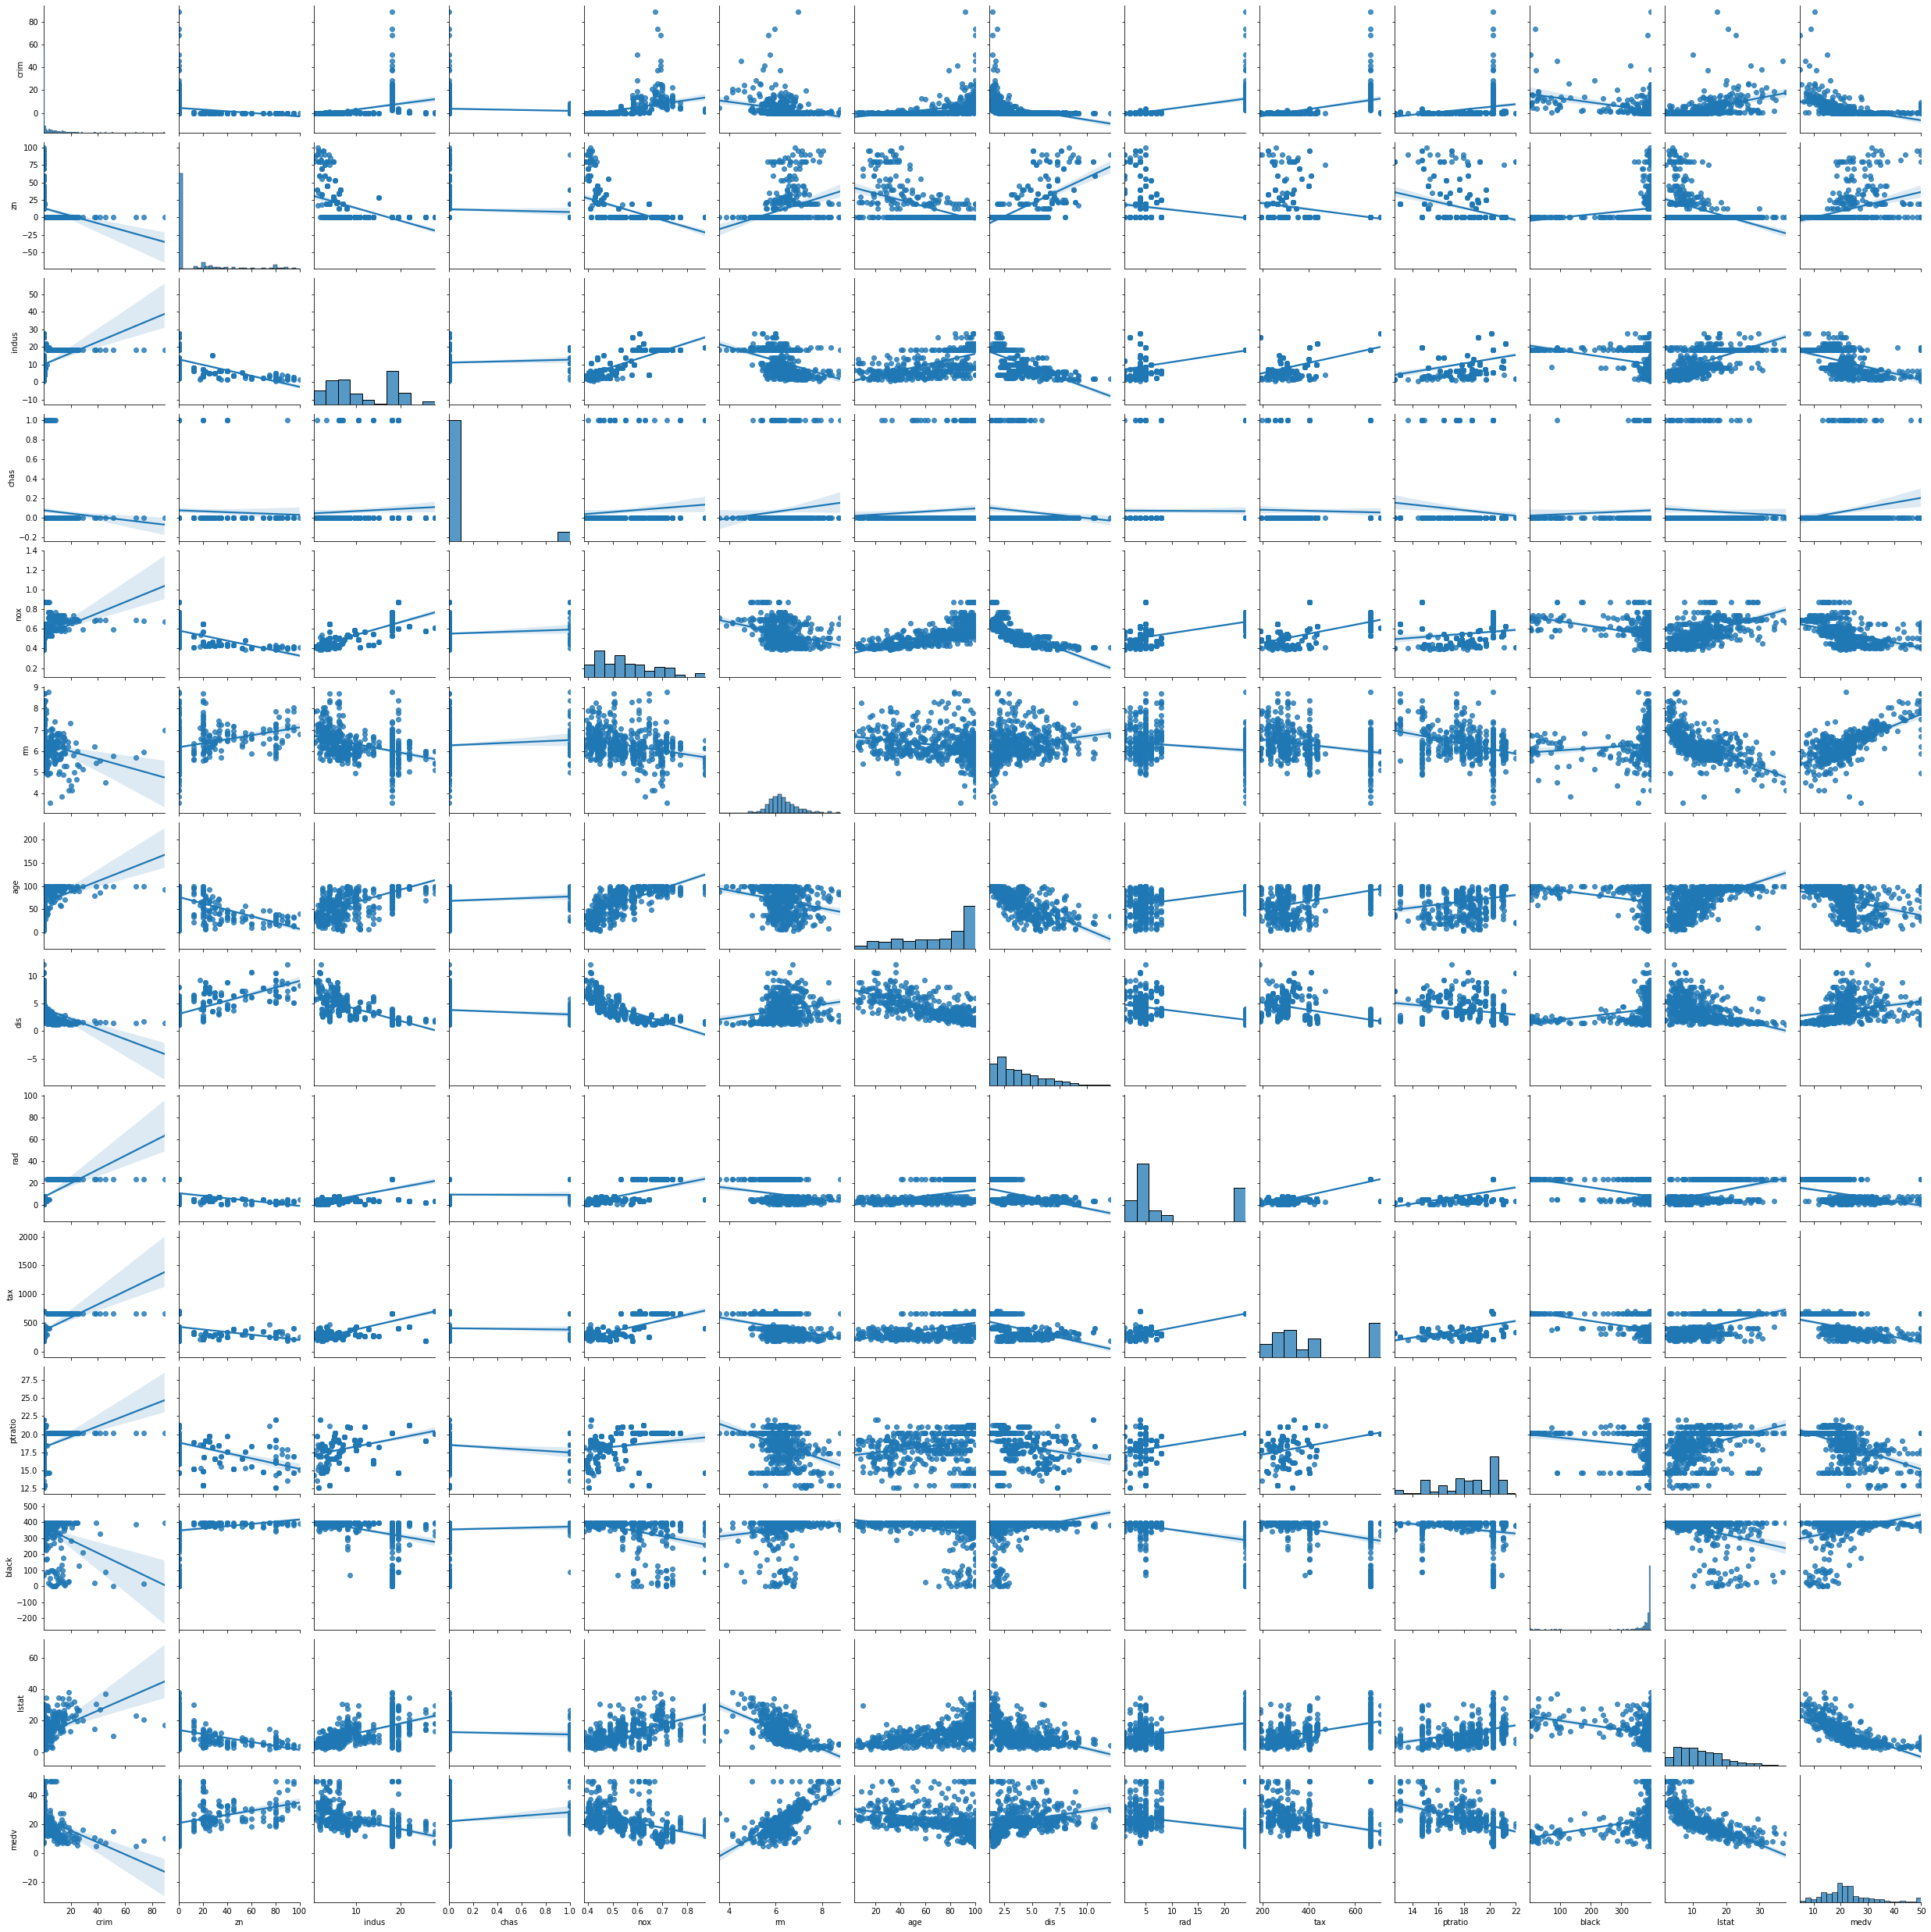

In [10]:
sns.pairplot(boston,kind="reg")

In [11]:
# check for null values
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

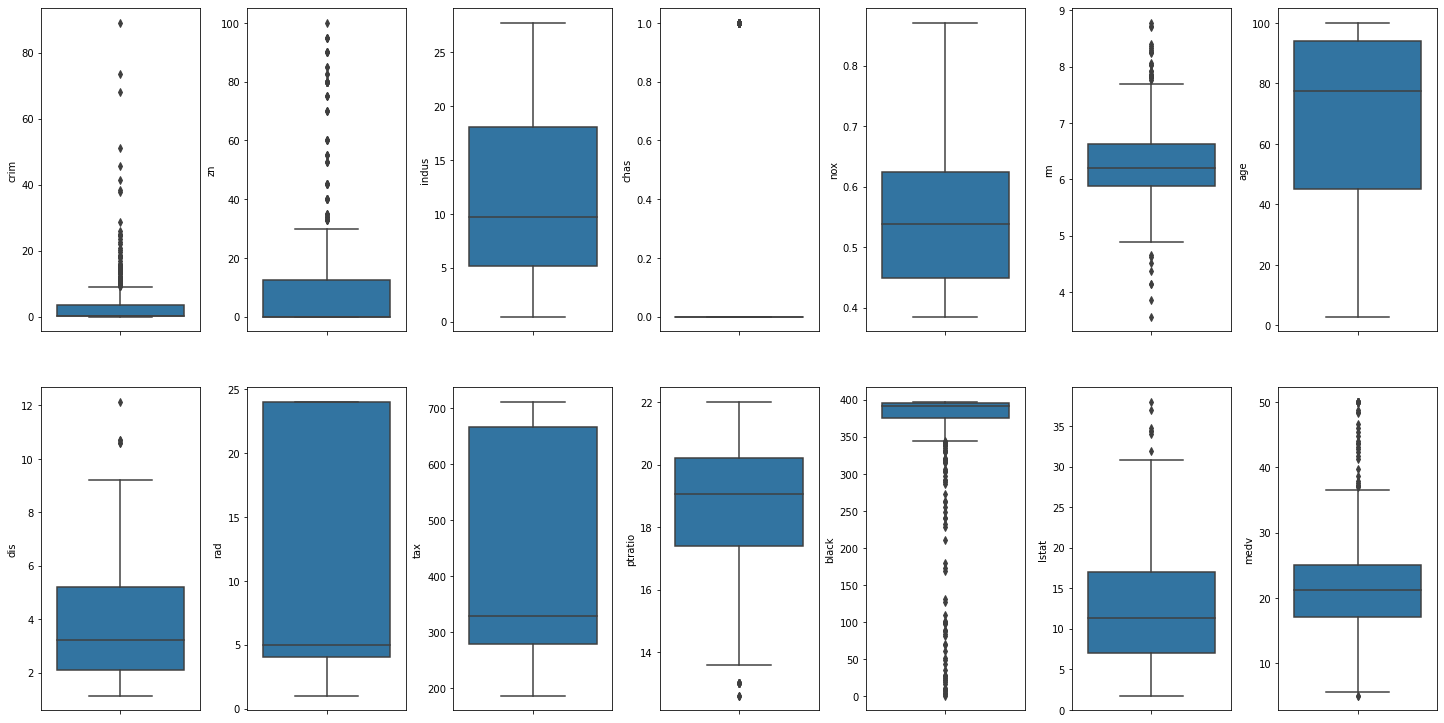

In [12]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.boxplot(y=col, data=boston, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


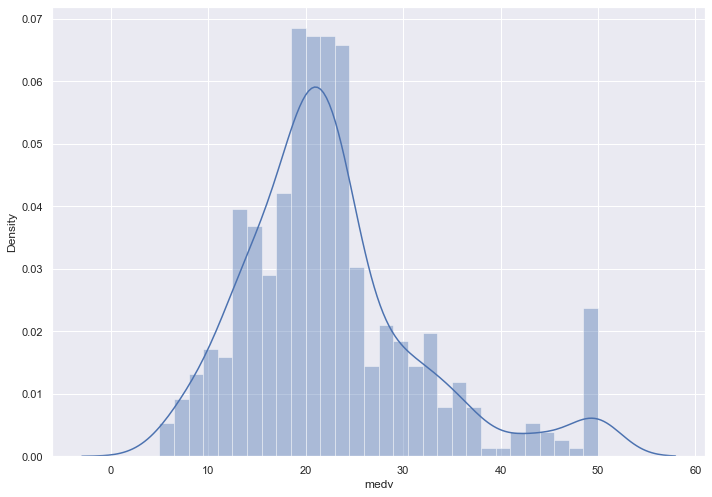

In [13]:
#Let’s first plot the distribution of the target variable MEDV.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['medv'], bins=30)
plt.show()

<AxesSubplot:xlabel='lstat', ylabel='medv'>

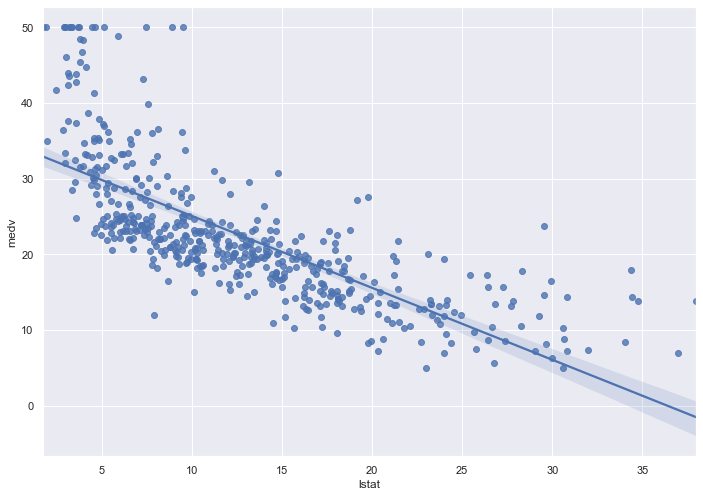

In [14]:
#Plotting the target variable MEDV with other features

sns.regplot(y=boston['medv'], x=boston['lstat'])

<AxesSubplot:xlabel='rm', ylabel='medv'>

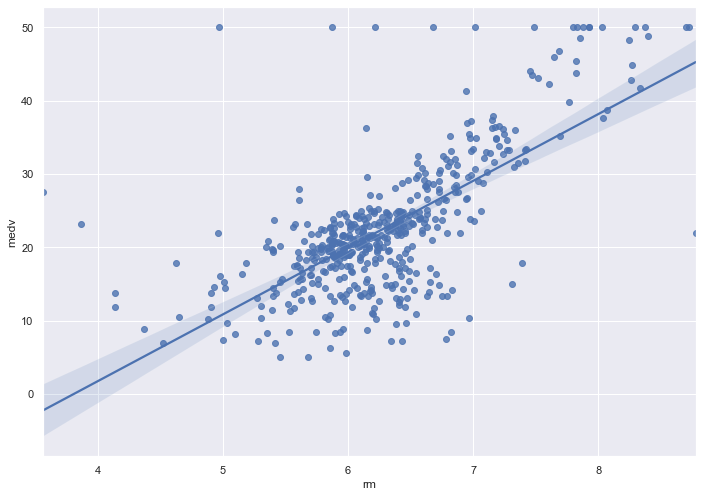

In [15]:
sns.regplot(y=boston['medv'], x=boston['rm'])

Columns like CRIM, ZN, RM, B seems to have outliers. Let's see the outliers percentage in every column.

In [16]:
for k, v in boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(boston)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column crim outliers = 13.04%
Column zn outliers = 13.44%
Column indus outliers = 0.00%
Column chas outliers = 100.00%
Column nox outliers = 0.00%
Column rm outliers = 5.93%
Column age outliers = 0.00%
Column dis outliers = 0.99%
Column rad outliers = 0.00%
Column tax outliers = 0.00%
Column ptratio outliers = 2.96%
Column black outliers = 15.22%
Column lstat outliers = 1.38%
Column medv outliers = 7.91%


Min-Max Normalization

In [17]:
cols = ['crim', 'zn', 'rm', 'black']
for col in cols:
    # find minimum and maximum of that column
    minimum = min(boston[col])
    maximum = max(boston[col])
    boston[col] = (boston[col] - minimum) / (maximum - minimum)

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

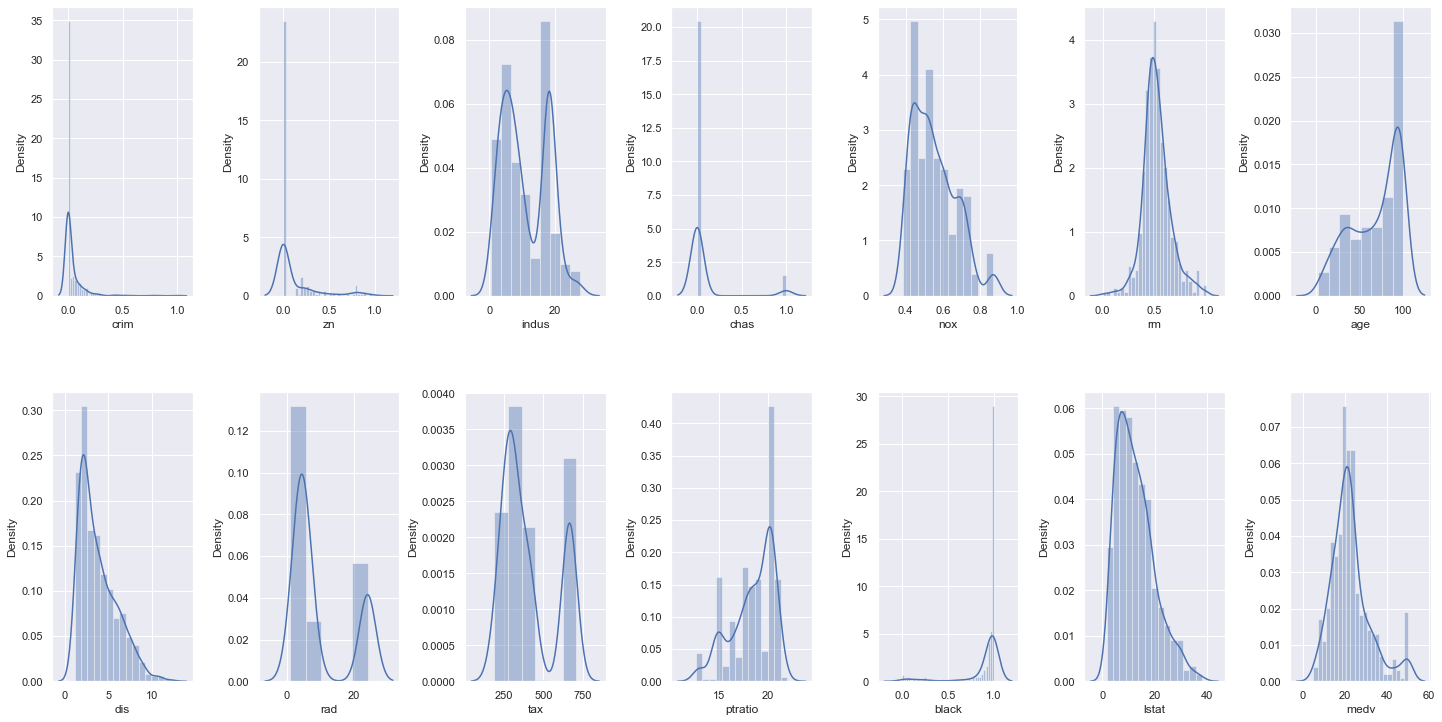

In [18]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

standardization

In [19]:

from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

# fit our data
scaled_cols = scalar.fit_transform(boston[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,crim,zn,rm,black
0,-0.419782,0.284830,0.413672,0.441052
1,-0.417339,-0.487722,0.194274,0.441052
2,-0.417342,-0.487722,1.282714,0.396427
3,-0.416750,-0.487722,1.016303,0.416163
4,-0.412482,-0.487722,1.228577,0.441052


In [20]:
for col in cols:
    boston[col] = scaled_cols[col]

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

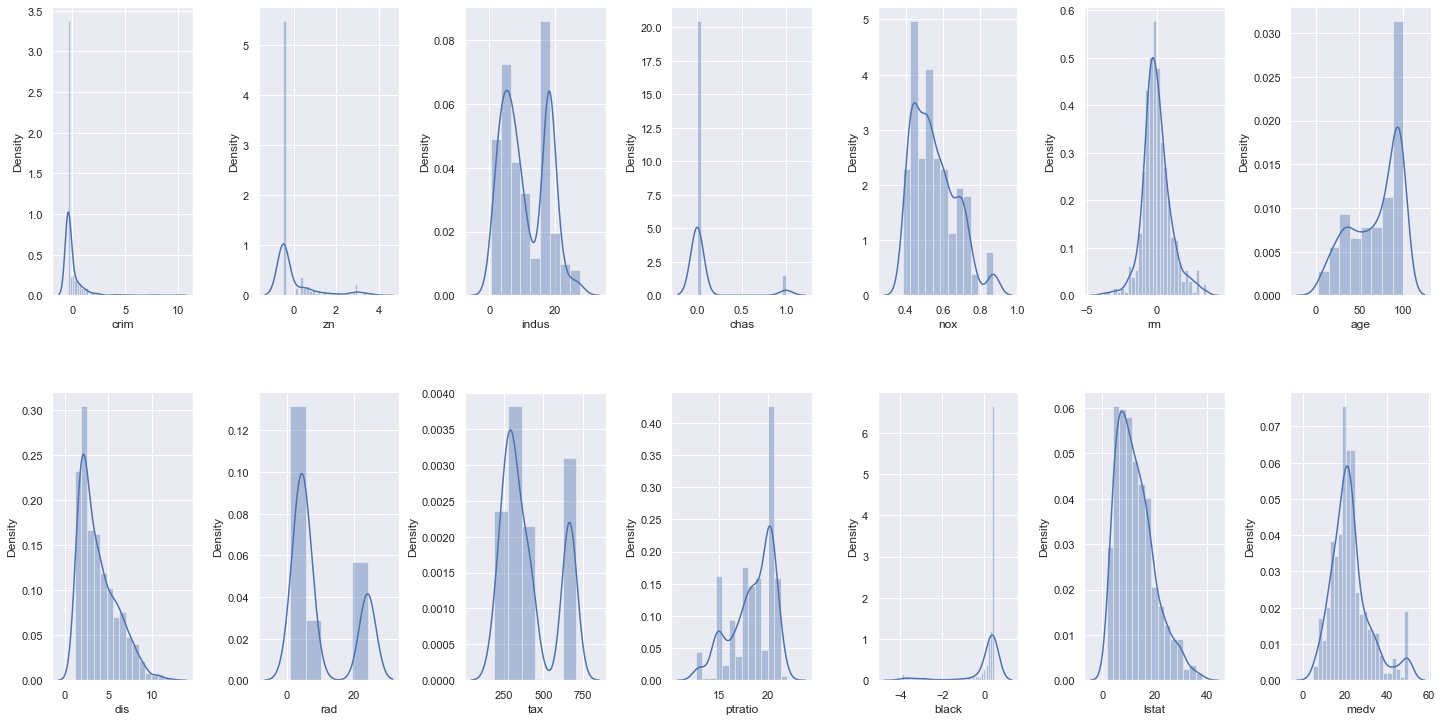

In [21]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in boston.items():
    sns.distplot(value, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

<AxesSubplot:>

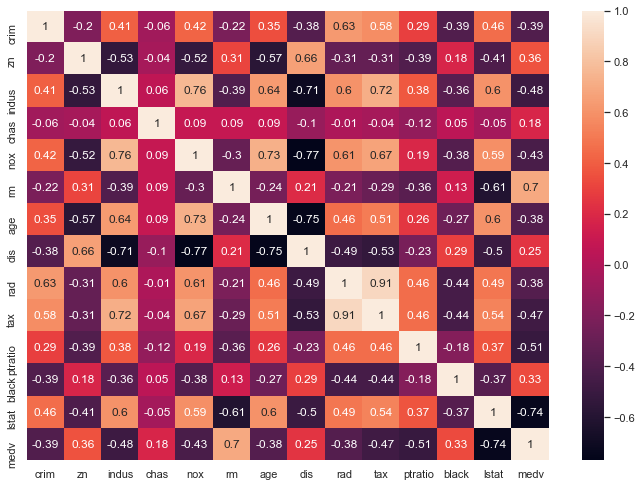

In [22]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [23]:
positiv_corrs = boston.corr()['medv'][boston.corr()['medv'] > 0]

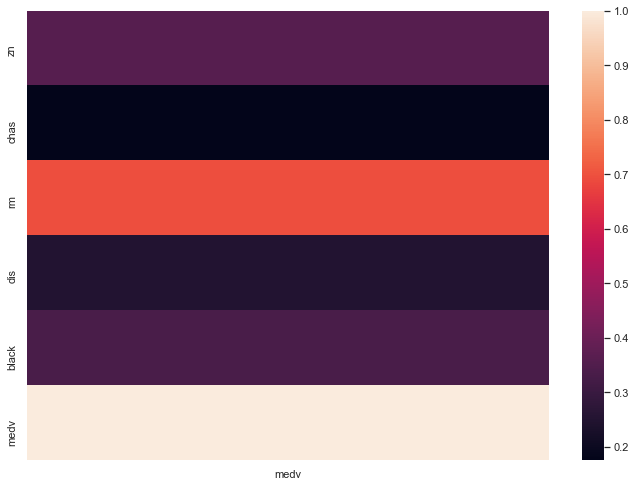

In [24]:
sns.heatmap(data=pd.DataFrame(positiv_corrs));

There is high correlation between the target house price and the number of rooms per dwelling.

## K-NEAREST NEIGHBORS (KNN) REGRESSION

In [26]:
#input split 
x = boston.drop(columns=['medv', 'rad'], axis=1)
y = boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [ ]:
print(x_train.shape())
print(x_test.shape())
print(y_train.shape())
print(y_test.shape())

In [27]:
from sklearn.neighbors import KNeighborsRegressor

knn_regressor=KNeighborsRegressor().fit(x_train,y_train)
knn_regressor.n_neighbors



5

### PREDICTION

In [28]:
y_pred=knn_regressor.predict(x_test)

print("MSE: ",mean_squared_error(y_test,y_pred))
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

MSE:  34.07733947368421
RMSE:  5.837579932958881


In [31]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.5426664371681305
Adjusted R^2: 0.503184402966818
MAE: 3.9972368421052633
MSE: 34.07733947368421
RMSE: 5.837579932958881


In [32]:
# Lets see effect of K- neighbours

MSE=[]
RMSE=[]

for k in range(10):
    k=k+1
    knn_regressor=KNeighborsRegressor(n_neighbors=k).fit(x_train,y_train)
    y_pred=knn_regressor.predict(x_test)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    MSE.append(mse)
    RMSE.append(rmse)
    print("k= ",k, " MSE: ",mse," RMSE: ",rmse)

k=  1  MSE:  33.82184210526316  RMSE:  5.815654916280982
k=  2  MSE:  33.95013157894737  RMSE:  5.82667414387894
k=  3  MSE:  33.20943713450293  RMSE:  5.7627629774703495
k=  4  MSE:  36.00754523026316  RMSE:  6.000628736246158
k=  5  MSE:  34.07733947368421  RMSE:  5.837579932958881
k=  6  MSE:  33.34541483918129  RMSE:  5.774548886205856
k=  7  MSE:  34.54067132116005  RMSE:  5.877131215240991
k=  8  MSE:  36.402748766447374  RMSE:  6.033469049099977
k=  9  MSE:  36.29472547108512  RMSE:  6.024510392644793
k=  10  MSE:  37.86667236842106  RMSE:  6.153590201534471


### Model tuning

In [33]:
# Repeated k fold CV
Rkfold_cv=model_selection.RepeatedKFold(n_splits=10,n_repeats=5,random_state=1)

In [34]:
knn_params={"n_neighbors":np.arange(1,30,1)}

knn=KNeighborsRegressor()
knn_gridSearch=GridSearchCV(knn,knn_params,cv=Rkfold_cv).fit(x_train,y_train)
knn_gridSearch.best_params_
best_grid_knn = knn_gridSearch.best_estimator_

In [37]:
# perform cross-validation
cv_score = cross_val_score(best_grid_knn, x, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
cv_score = np.abs(np.mean(cv_score))

cv_score

32.735822126361654

## REGRESSION TREES
Predict continuous valued outputs.

In [38]:
#input split 
x = boston.drop(columns=['medv', 'rad'], axis=1)
y = boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [39]:
regg_tree=DecisionTreeRegressor(max_leaf_nodes=10)
regg_tree.fit(x_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

### Prediction

In [40]:
y_pred=regg_tree.predict(x_test)
mean_squared_error(y_test,y_pred)

16.155491643578205

In [41]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.7831858746377853
Adjusted R^2: 0.7644681084194647
MAE: 3.1095685157268695
MSE: 16.155491643578205
RMSE: 4.0193894615449


### Model Tuning

In [42]:
# Repeated k fold CV
Rkfold_cv=model_selection.RepeatedKFold(n_splits=10,n_repeats=5,random_state=1)

In [43]:
regg_tree_params={"min_samples_split":range(2,7),
                 "max_leaf_nodes":range(2,7)}

regg_tree_gridSearch=GridSearchCV(regg_tree,regg_tree_params,cv=Rkfold_cv)
regg_tree_gridSearch.fit(x_train,y_train)
regg_tree_gridSearch.best_params_
best_grid_regg = regg_tree_gridSearch.best_estimator_

In [44]:
# perform cross-validation
cv_score = cross_val_score(best_grid_regg, x, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
cv_score = np.abs(np.mean(cv_score))

cv_score

23.169717787433946

## BAGGED TREES
Bootstrap aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method. Bootstrapping is the process of randomly sampling subsets of a dataset over a given number of iterations and a given number of variable

In [45]:
#input split 
x = boston.drop(columns=['medv', 'rad'], axis=1)
y = boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [46]:
bagged_model=BaggingRegressor(bootstrap_features=True)
bagged_model.fit(x_train,y_train)

BaggingRegressor(bootstrap_features=True)

In [47]:
bagged_model.estimators_

[DecisionTreeRegressor(random_state=2082480979),
 DecisionTreeRegressor(random_state=1159178584),
 DecisionTreeRegressor(random_state=342510854),
 DecisionTreeRegressor(random_state=1175394975),
 DecisionTreeRegressor(random_state=2035883910),
 DecisionTreeRegressor(random_state=1092120724),
 DecisionTreeRegressor(random_state=550542388),
 DecisionTreeRegressor(random_state=459557608),
 DecisionTreeRegressor(random_state=1332387810),
 DecisionTreeRegressor(random_state=282423923)]

In [48]:
# Samples of each tree:
bagged_model.estimators_samples_

[array([ 21, 189,   1, 332, 286, 169, 277, 203, 279,  31,  96, 350, 214,
        164, 103, 198, 271,  91, 144, 231, 238,   5, 309, 349, 129, 141,
        180, 269, 342,  70,  64, 115, 239, 151, 124, 288, 215,  82, 270,
        325, 157,  50, 229,  21, 186, 292, 150, 208,  34, 249,  51,  43,
         75, 262, 207, 143, 147, 284,   5, 218, 281, 128, 192, 182, 266,
        146, 262, 272, 152, 145, 222,  31, 181,  54, 214,  82, 306, 126,
         60, 156,  84, 284,  67, 203, 189, 284, 124,  47,  49, 141, 352,
        130, 169, 207, 105,  39, 137, 302,  61, 317,  26, 220, 247, 218,
        339, 115, 198,  76, 257,  55, 285, 227, 163,  46, 278,  46, 298,
        251, 311, 134, 341,  36, 244, 249, 317,  62,  77,  76, 131,  76,
         74, 221,  15,  45, 164, 123,  18,  19, 319,   8,  75, 312,  93,
         13, 230, 104, 350,  34,  87, 352, 165, 320,  33, 130, 282,  49,
        107, 263,  85, 141, 328,  55, 165, 229, 207,  50, 352, 187, 328,
        197,  83, 235, 154, 217, 205,  67, 246,  11

In [49]:
# Independent variables of each tree:
bagged_model.estimators_features_

[array([ 3, 11, 11, 10,  9, 10, 11, 11,  7,  0,  6,  1]),
 array([ 8, 11,  3,  0,  9,  7,  2,  1,  5,  9,  8,  8]),
 array([ 6,  8,  6, 10,  2, 11,  6,  9,  2,  3,  3,  4]),
 array([ 1,  7,  8,  5,  5,  0,  1,  9, 10,  7, 10, 11]),
 array([ 6, 10,  7,  2,  2, 11,  9,  9,  1,  5,  0,  5]),
 array([ 4,  4,  8, 10,  0,  3,  5,  6,  5,  0,  8,  8]),
 array([ 4,  2,  7,  1,  9,  5,  3, 11,  4, 10,  6,  5]),
 array([ 8,  3,  2,  2,  4, 11,  1,  8,  2,  8,  8,  4]),
 array([ 2,  1,  1,  8, 11,  2,  8,  1,  4,  7,  5,  2]),
 array([ 3,  2,  1,  6, 10, 11,  0,  5,  1,  3,  5,  2])]

In [50]:
# Values of each model:
bagged_model.estimators_[5]

DecisionTreeRegressor(random_state=1092120724)

### Prediction

In [51]:
y_pred=bagged_model.predict(x_test)
mean_squared_error(y_test,y_pred)

11.786453289473682

In [52]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8418203780201494
Adjusted R^2: 0.8281645833168529
MAE: 2.5566447368421055
MSE: 11.786453289473682
RMSE: 3.4331404412685598


In [53]:
# Lets look all trees:
for i in range(0,len(bagged_model.estimators_features_)):
    
    other_y_pred=bagged_model.estimators_[i].fit(x_train,y_train).predict(x_test)
    print("Tree: ",i,"MSE: ",mean_squared_error(other_y_pred,y_test))

Tree:  0 MSE:  19.345657894736842
Tree:  1 MSE:  19.790855263157898
Tree:  2 MSE:  11.587828947368424
Tree:  3 MSE:  19.374934210526316
Tree:  4 MSE:  19.540986842105262
Tree:  5 MSE:  11.262565789473687
Tree:  6 MSE:  12.183947368421054
Tree:  7 MSE:  10.85953947368421
Tree:  8 MSE:  19.333421052631582
Tree:  9 MSE:  19.28730263157895


### Model tuning

In [54]:
# Repeated k fold CV
Rkfold_cv=model_selection.RepeatedKFold(n_splits=10,n_repeats=5,random_state=1)

In [55]:
bag_params={"n_estimators":range(2,7)}
bag_gridSearch=GridSearchCV(bagged_model,bag_params,cv=Rkfold_cv)
bag_gridSearch.fit(x_train,y_train)
bag_gridSearch.best_params_
best_grid_bag = bag_gridSearch.best_estimator_

In [56]:
# perform cross-validation
cv_score = cross_val_score(best_grid_bag, x, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
cv_score = np.abs(np.mean(cv_score))

cv_score

15.26156398862261

## RANDOM FORESTS
Evaluation of the predictions produced by multiple decision trees by bringing them together. Derived from Bagged Trees.

In [57]:
#input split 
x = boston.drop(columns=['medv', 'rad'], axis=1)
y = boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [58]:
rf_model=RandomForestRegressor(random_state=42)
rf_model.fit(x_train,y_train)


RandomForestRegressor(random_state=42)

In [59]:
rf_model.n_estimators

100

### Prediction

In [60]:
y_pred=rf_model.predict(x_test)
mean_squared_error(y_pred,y_test)

9.552976427631577

In [61]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.8717946643495618
Adjusted R^2: 0.8607265778185886
MAE: 2.084611842105263
MSE: 9.552976427631577
RMSE: 3.0907889652371248


### Model tuning

In [62]:
# Repeated k fold CV
Rkfold_cv=model_selection.RepeatedKFold(n_splits=10,n_repeats=5,random_state=1)

In [63]:
rf_params={"max_depth":list(range(1,10)),
          "max_features":[3,5],
          "n_estimators":[100,200]}

rf_gridSearch=GridSearchCV(rf_model,rf_params,cv=Rkfold_cv)
rf_gridSearch.fit(x_train,y_train)
rf_gridSearch.best_params_
best_grid_rf = rf_gridSearch.best_estimator_

In [64]:
# perform cross-validation
cv_score = cross_val_score(best_grid_rf, x, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
cv_score = np.abs(np.mean(cv_score))

cv_score

10.182170824251935

## EXTREME GRADIENT BOOSTING (xgBOOST)
XGBoost is an implementation of Gradient Boosting. Decision trees are created in sequential form.

In [65]:
#input split 
x = boston.drop(columns=['medv', 'rad'], axis=1)
y = boston['medv']

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [70]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 12)
(152, 12)
(354,)
(152,)


In [66]:
xgb_model=XGBRegressor().fit(x_train,y_train)



### Prediction

In [67]:
y_pred=xgb_model.predict(x_test)
mean_squared_error(y_pred,y_test)

9.28867514117181

### Model tuning

In [71]:
# Repeated k fold CV
Rkfold_cv=model_selection.RepeatedKFold(n_splits=10,n_repeats=5,random_state=1)

In [72]:
xgb_params={
    
    "colsample_bytree":[0.4,0.5],
    "learning_rate":[0.1,0.01],
    "max_depth":[2,3],
    "n_estimators":[100,200]
}

xgb_gridSearch=GridSearchCV(xgb_model,xgb_params,cv=Rkfold_cv,n_jobs=-1,verbose=2)
xgb_gridSearch.fit(x_train,y_train)

xgb_gridSearch.best_params_

best_grid_xg = xgb_gridSearch.best_estimator_

Fitting 50 folds for each of 16 candidates, totalling 800 fits


In [73]:
# perform cross-validation
cv_score = cross_val_score(best_grid_rf, x, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
cv_score = np.abs(np.mean(cv_score))

cv_score

10.182170824251935

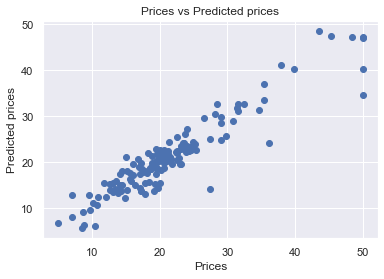

In [75]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

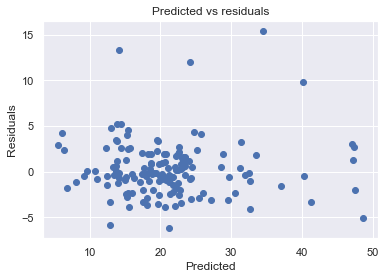

In [77]:
# Checking residuals
plt.scatter(y_pred,y_test-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#Model Training
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y, params):
    
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    
    # Repeated k fold CV
    Rkfold_cv=model_selection.RepeatedKFold(n_splits=5,n_repeats=10,
                              random_state=1)
    
    # perform gridsearch cv
    gridsearch = GridSearchCV(model,params,cv=10)
    
    gridsearch.fit(x_train, y_train)
    
    best_grid = gridsearch.best_estimator_
    gridsearch.best_params_
    
    
    # perform cross-validation
    cv_score = cross_val_score(best_grid, X, y, scoring='neg_mean_squared_error', cv=Rkfold_cv)
    cv_score = np.abs(np.mean(cv_score))
    
    
    # predict the training set
    pred = model.predict(x_test)
    
    
    print("Model Report")
    print("MSE:",mean_squared_error(y_test, pred))
    print('CV Score:', cv_score)
    print('Best parameters:',gridsearch.best_params_)
   

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

There is no pattern visible in this plot and values are distributed equally around zero

In [ ]:
# Checking Normality of errors
sns.distplot(y_train-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

For Test data :

In [ ]:
# Predicting Test data with the model
y_test_pred = lm.predict(X_test)


In [ ]:
# Model Evaluation
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Random Forest Regressor

In [ ]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
reg = RandomForestRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

In [ ]:
#Model Evaluation 

# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
# For Test data :

# Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

XGBoost Regressor 

In [ ]:

#Training the model :

# Import XGBoost Regressor
from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

In [ ]:
#Model Evaluation :

# Model prediction on train data
y_pred = reg.predict(X_train)

In [ ]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

In [ ]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [ ]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [ ]:
#For test data :

#Predicting Test data with the model
y_test_pred = reg.predict(X_test)

In [ ]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

In [ ]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R-squared Score': [acc_linreg*100, acc_rf*100, acc_xgb*100]})
models.sort_values(by='R-squared Score', ascending=False)

XGBoost Regression has the highest R-squared score and is the best model for the Boston dataset.